In [1]:
import pandas as pd

df = pd.read_csv('offer_responses.csv')
df.head()

,responses,offer_discount,offer_quality,offer_reach
0,4151.0,26.0,10.257680,31344.0
1,3397.0,35.0,15.194380,24016.0
2,3274.0,21.0,13.971468,28832.0
3,3426.0,27.0,6.054338,26747.0
4,5745.0,42.0,16.801365,46968.0


<AxesSubplot:>

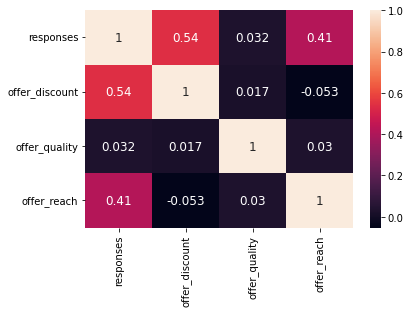

In [11]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True,annot_kws={"size": 12})

In [6]:
df.columns

Index(['responses', 'offer_discount', 'offer_quality', 'offer_reach'], dtype='object')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], random_state=10)

In [5]:
# crear un modelo de regresion lineal con los datos de entrenamiento

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

rmse = mean_squared_error(y_test, predictions)**0.5

print(f'RMSE: {rmse}')

RMSE: 966.2461828577906


In [12]:
# evaluar el rmse quiatando cada una de las variables 'offer_discount', 'offer_quality', 'offer_reach' en x_test y x_train

list_var = ['offer_discount', 'offer_quality', 'offer_reach']

for colum in list_var:
    X_train_ = X_train.drop(colum, axis=1)
    X_test_ = X_test.drop(colum, axis=1)
    lr = LinearRegression(normalize=True)
    lr.fit(X_train_, y_train)
    predictions = lr.predict(X_test_)
    rmse = mean_squared_error(y_test, predictions)**0.5
    print(f'RMSE sin {colum}: {rmse}')

RMSE sin offer_discount: 1231.6766556327284
RMSE sin offer_quality: 965.5346123758474
RMSE sin offer_reach: 1185.8456831644116
